In [10]:
import numpy as np
import matplotlib.pyplot as plt
import math
from numpy import linalg as LA
from scipy.sparse.linalg import eigsh
from sklearn.datasets import make_swiss_roll
from mpl_toolkits.mplot3d import Axes3D
from scipy import linalg

In [2]:
def create_diffusion_map(X, L):
    #Step 1
    N = X.shape[0]
    D = np.zeros((N, N))
    for i in range(N):
        for j in range(N):
            distance = (X[i] - X[j])
            D[i][j] = math.sqrt(np.sum(distance * distance))
    #Step 2
    epsilon = 0.05 * np.max(D)
    #Step 3
    W = np.exp(-np.power(D, 2)/epsilon)
    #Step 4
    P = np.zeros((N, N))
    for i in range(N):
        P[i,i] = np.sum(W[i])
    #Step 5
    inv_P = LA.inv(P)
    K = inv_P.dot(W.dot(inv_P))
    #Step 6
    Q = np.zeros((N, N))
    for i in range(N):
        Q[i,i] = np.sum(K[i])
    #Step 7
    inv_Q_sqrt = np.sqrt(LA.inv(Q))
    T = inv_Q_sqrt.dot(K.dot(inv_Q_sqrt))
    #Step 8
    a, v = eigsh(T,k=L+1)
    #Step 9
    _lambda = np.sqrt(np.power(a, 1/epsilon))
    #Step 10
    _fi = inv_Q_sqrt.dot(v)
    return _lambda, _fi

In [3]:
N = 5000
X, color = make_swiss_roll(N)

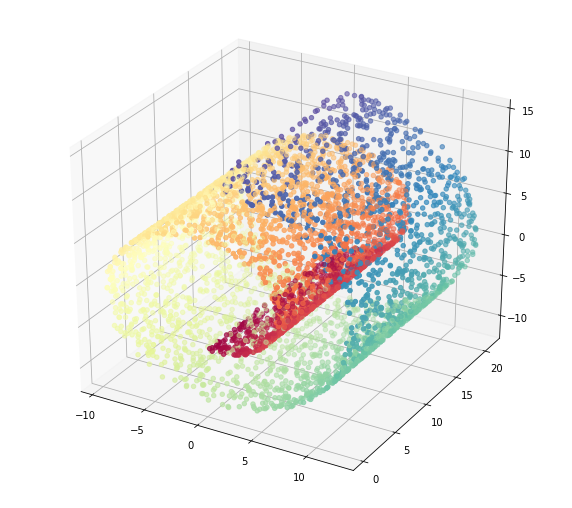

In [4]:
fig = plt.figure(figsize=(10, 20))

ax = fig.add_subplot(211, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)

In [5]:
_lambda, _fi = create_diffusion_map(X, 4998)

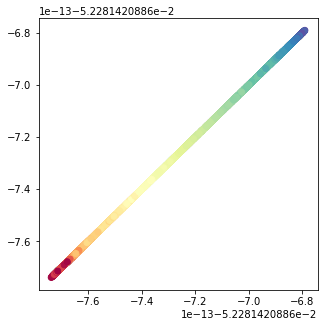

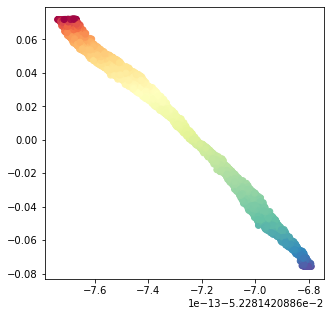

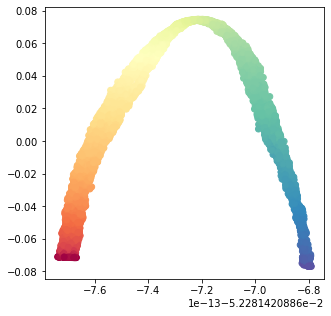

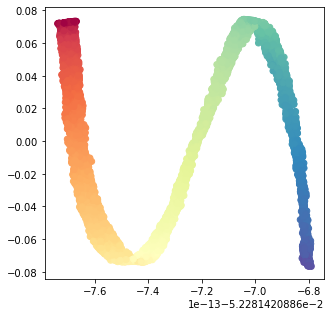

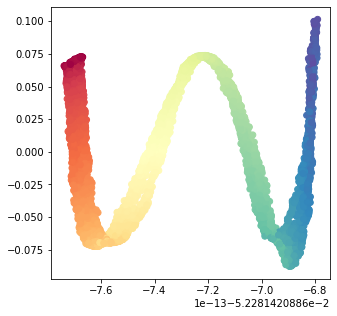

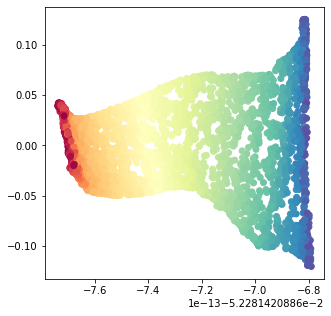

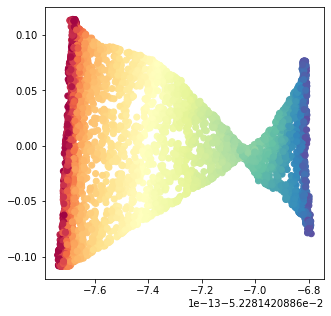

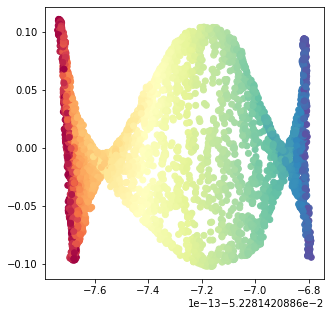

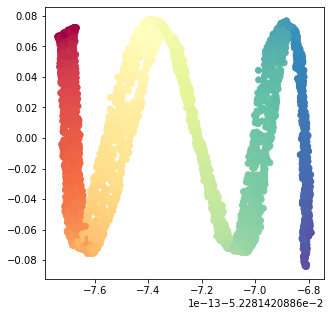

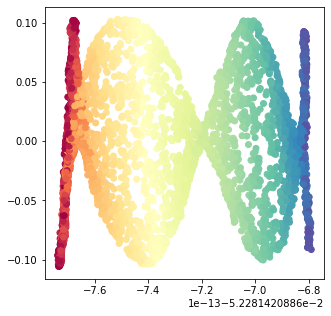

In [40]:
constant_eigenfunction = _fi[:,-1]
for i in range(10):
    index = -1 - i
    fig = plt.figure(figsize=(5, 5))
    ax = fig.add_subplot(111)
    ax.scatter(constant_eigenfunction, _fi[:,index], c=color, cmap=plt.cm.Spectral)

Calculate PCA

In [24]:
def calculate_pca(data, pc_count):
    U, S, Vt = linalg.svd(data)

    U = U[:, 0:pc_count]

    sigma = np.zeros((U.shape[1], Vt.shape[0]))
    for i in range(min(sigma.shape[0], sigma.shape[1])):
        sigma[i, i] = S[i]

    pca_matrix = data.dot(Vt.T)
    pca_components = Vt
    pca_variance = np.var(pca_matrix, axis=0)
    pca_variance_ratio = pca_variance / np.sum(pca_variance)

    reconstructed_data= np.dot(U, np.dot(sigma, Vt))

    print(f"Explained Variance Ratio: {pca_variance_ratio[0:pc_count]}")
    print(f"Sum of Explained Variance ratios (Total Energy Captured): {np.sum(pca_variance_ratio[0:pc_count])}")
    
    return reconstructed_data

In [25]:
calculate_pca(X, 3)

Explained Variance Ratio: [0.28976445 0.39609484 0.31414072]
Sum of Explained Variance ratios (Total Energy Captured): 1.0


array([[-5.51943667, 11.13278768,  6.53662012],
       [ 6.31518334, 20.91806299,  0.22820232],
       [ 5.14005206,  0.16057376,  4.80275867],
       ...,
       [-0.50611922, 16.66018937,  7.9017535 ],
       [ 0.3370374 , 14.70510026, -4.7710246 ],
       [ 0.42481285,  1.14204294, -4.7821577 ]])

Explained Variance Ratio: [0.28976445 0.39609484]
Sum of Explained Variance ratios (Total Energy Captured): 0.6858592833503976


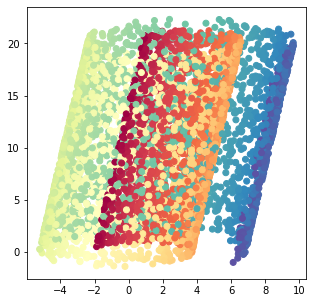

In [27]:
reconstructed_data = calculate_pca(X, 2)

fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
ax.scatter(reconstructed_data[:,0], reconstructed_data[:,1], c=color, cmap=plt.cm.Spectral)

In [28]:
N2 = 1000
X_1000, color_1000 = make_swiss_roll(N2)

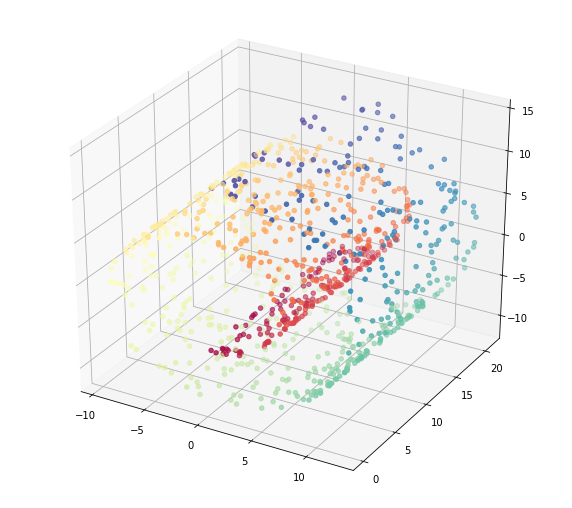

In [29]:
fig = plt.figure(figsize=(10, 20))

ax = fig.add_subplot(211, projection='3d')
ax.scatter(X_1000[:, 0], X_1000[:, 1], X_1000[:, 2], c=color_1000, cmap=plt.cm.Spectral)

In [32]:
_lambda_1000, _fi_1000 = create_diffusion_map(X_1000, 998)

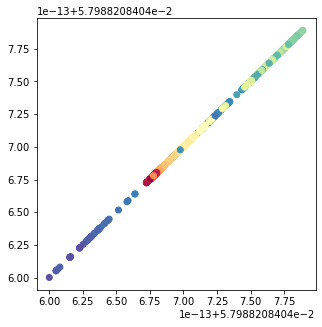

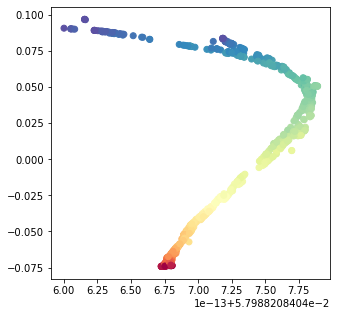

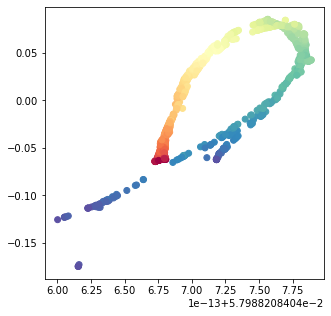

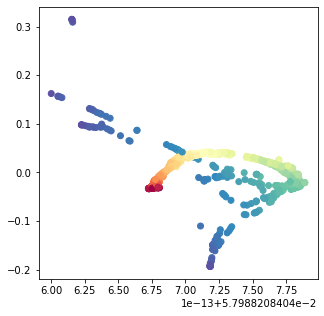

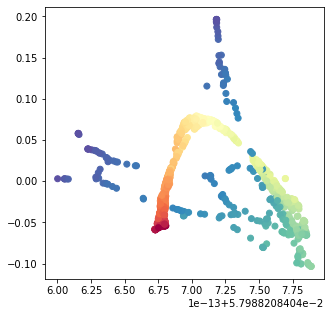

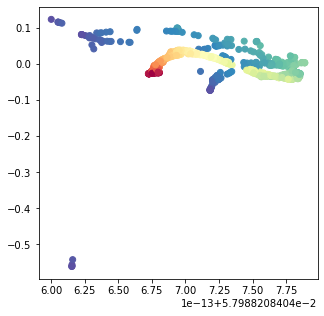

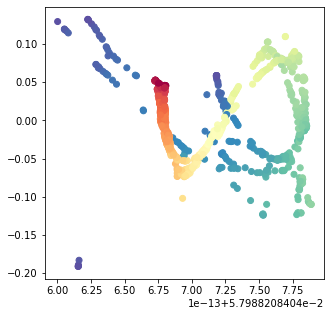

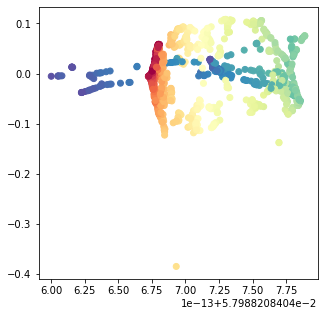

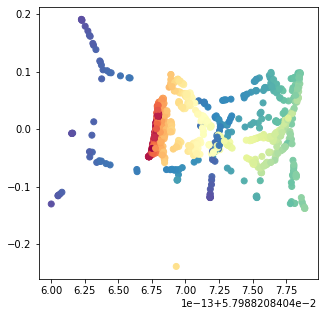

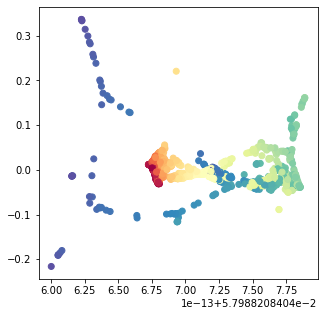

In [41]:
constant_eigenfunction_1000 = _fi_1000[:,-1]
for i in range(10):
    index = -1 - i
    fig = plt.figure(figsize=(5, 5))
    ax = fig.add_subplot(111)
    ax.scatter(constant_eigenfunction_1000, _fi_1000[:,index], c=color_1000, cmap=plt.cm.Spectral)

Explained Variance Ratio: [0.28448529 0.3906962 ]
Sum of Explained Variance ratios (Total Energy Captured): 0.6751814869557731


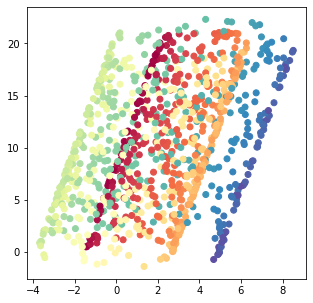

In [39]:
reconstructed_data = calculate_pca(X_1000, 2)

fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
ax.scatter(reconstructed_data[:,0], reconstructed_data[:,1], c=color_1000, cmap=plt.cm.Spectral)